In [1]:
!pip install pyLDAvis
!pip install konlpy

     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 20.8 MB/s 
     |████████████████████████████████| 15.7 MB 58 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=8d4c3f939b13af5b576808dfc3e76774deaaf073e7e9f7dc3b2cc23e309bb731
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 448 kB 72.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim_models as gensimvis
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel

from konlpy.tag import Okt
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
okt = Okt()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packa

In [3]:
df_origin = pd.read_csv("/content/drive/MyDrive/건설현장_안전사고_news_from_joongang.csv")
df = df_origin.copy()
df = df[['제목', '내용']]

In [4]:
df

,제목,내용
0,태양광탄소중립 속도전에 벌목공이 쓰러진다,김기찬 고용노동전문기자 몇해 전이다 인기몰이하던 무한도전이 시청자를 경...
1,미래 신산업 허브 인천 통학길 안전 강화 무인단속카메라 설치미래 주역 어린이 위한 ...,인천 중구 인천 중구는 어린이안전 관련 18개 부서에서 3개 분야 25개 과제의 어...
2,국민을 위한 국민의 기업 불공정 신고센터 임금체불 방지TF 운영투명하고 공정한 하도...,한국남동발전 한국남동발전은 건설 현장의 동반성장 문화 정착 불공정행위 방지 안...
3,태풍 찬투 남쪽으로 멀어졌다17일 제주 거쳐 향할듯,그래픽신재민 기자 shinjaeminjoongangcokr 국내로 접근...
4,LIVE 한눈에 보는 세상 사진으로 읽는 하루7일 국내엔 지금 무슨 일이,하루 국내 뉴스를 실시간 업데이트한다 사진전송시간 기준으로 오늘의 주요 뉴스를 한 ...
...,...,...
296,위험도사린 지하철공사장,서울지하철건설현장 곳곳에 아직도 크고 작은 위험이 도사리고 있어 통행인의 불편과 안...
297,3,고속도로나 다리건설과는 달리 토목건축궤도차량전기신호통신 등 거의 모든 분야의 기술이...
298,거의 공채차관에 의존하고도 공비모자라,충분한 자금없이 한목에 너무 많은 공사를 벌여놓은 서울지하철건설은 완공시기까지 앞당...
299,1청동제 거인타로스신화가 현실로부엌일서 우주탐사까지전쟁도 대신할날 멀지않아,로보트들이 요란한 발자국 소리를 내면서 달려오고 있다 로보트들은 이제 인간들이 차지...


In [5]:
title_list = []
body_list = []

for i in df.index:
    title_list.append(df['제목'].loc[i])
    body_list.append(df['내용'].loc[i])

In [6]:
title_noun_word=[]
for title_text in title_list:
    title_noun_word.append(okt.nouns(title_text))
  
body_noun_word=[]

for body_text in body_list:
    try:
        body_noun_word.append(okt.nouns(body_text))
    except:
        continue

In [7]:
stop_words = '경우 백 곳 또 한국 작업 때문 층 때 지역 로 것 와 당 명 위 신 사람 하기 뜻 점 순 타 보 히 세 개 이 과 가 수 등 건설 현장 안전 사고 것 공사 수 업체 산업 이 사업 말 명 위 위해 대한 기자 명 기술 그 및 법 를 중 전'
stop_words=stop_words.split(' ')

new_body_noun = []

for body_text in body_noun_word:
    new_body_text = []
    for text in body_text:
      if text not in stop_words:
        new_body_text.append(text)
    new_body_noun.append(new_body_text)

print(len(new_body_noun))

299


In [8]:
news_body = new_body_noun
dictionary = corpora.Dictionary(news_body)
corpus = [dictionary.doc2bow(text) for text in news_body]

In [9]:
coherence_values =[]
for i in range(2,15):
  ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
  coherence_model_lda = CoherenceModel(model=ldamodel, texts=news_body, dictionary=dictionary, topn=10)
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_values.append(coherence_lda)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

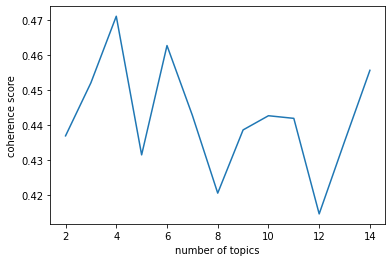

In [10]:
x= range(2,15)
plt.plot(x, coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [11]:
preplexity_values = []
for i in range(2,20):
  ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
  preplexity_values.append(ldamodel.log_perplexity(corpus))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

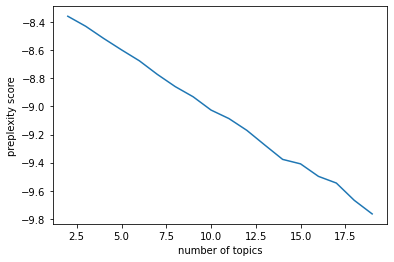

In [12]:
x= range(2,20)
plt.plot(x, preplexity_values)
plt.xlabel('number of topics')
plt.ylabel('preplexity score')
plt.show()

In [20]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, alpha=0.1, id2word=dictionary)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [21]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.006*"재해" + 0.004*"중대" + 0.004*"크레인" + 0.004*"타워" + 0.004*"발생" + 0.003*"관리" + 0.003*"기업" + 0.003*"관련" + 0.003*"근로자" + 0.003*"환경" + 0.003*"예방" + 0.003*"사장" + 0.002*"중" + 0.002*"처벌" + 0.002*"문제" + 0.002*"설치" + 0.002*"대응" + 0.002*"지난해" + 0.002*"이상" + 0.002*"아파트"'),
 (1,
  '0.004*"점검" + 0.003*"발생" + 0.003*"시설" + 0.003*"근로자" + 0.003*"관리" + 0.003*"지난해" + 0.003*"사장" + 0.002*"계획" + 0.002*"회사" + 0.002*"서울" + 0.002*"상황" + 0.002*"운영" + 0.002*"아파트" + 0.002*"예방" + 0.002*"정부" + 0.002*"문제" + 0.002*"설치" + 0.002*"지난" + 0.002*"위험" + 0.002*"도로"'),
 (2,
  '0.008*"관리" + 0.005*"발생" + 0.005*"점검" + 0.004*"재해" + 0.004*"위험" + 0.003*"정부" + 0.003*"사장" + 0.003*"예방" + 0.003*"기업" + 0.003*"근로자" + 0.003*"회사" + 0.003*"중대" + 0.003*"지난" + 0.002*"직원" + 0.002*"지난해" + 0.002*"이상" + 0.002*"시설" + 0.002*"관련" + 0.002*"처벌" + 0.002*"중"'),
 (3,
  '0.003*"근로자" + 0.003*"점검" + 0.003*"관리" + 0.003*"예방" + 0.003*"발생" + 0.003*"서울" + 0.003*"철도" + 0.003*"기업" + 0.003*"정부" + 0.002*"운영" + 0.002*"일" + 0.002*"시설" + 0.002*"지난해" + 0.002*"건

In [22]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.015231  0.010541       1        1  38.340960
0      0.017095  0.008728       2        1  26.490969
1     -0.001823 -0.005922       3        1  20.795098
3     -0.000042 -0.013346       4        1  14.372973, topic_info=     Term        Freq       Total Category  logprob  loglift
840   크레인  148.000000  148.000000  Default  30.0000  30.0000
842    타워  142.000000  142.000000  Default  29.0000  29.0000
2108   철도   84.000000   84.000000  Default  28.0000  28.0000
243    중대  192.000000  192.000000  Default  27.0000  27.0000
610    서울  160.000000  160.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
17     계획   24.292257  166.192900   Topic4  -6.2214   0.0168
184    위험   26.513387  223.342032   Topic4  -6.1339  -0.1912
307    관련   23.631436  194.198146   Topic4  -6.2489  -0.1665
914    직원   22.839230  174.027850   Topic4  -6.2830  -0.0909
240     중   22.829588  180.845922   Topic4  -6.2835  -0.1298

[362 rows x 6 columns], token_table=      Topic      Freq Term
term                      
8302      1  0.792312   가가
8302      4  0.264104   가가
9096      2  0.557626  갈마동
1071      1  0.286903   감리
1071      2  0.227132   감리
...     ...       ...  ...
1218      2  0.157010   훈련
1218      3  0.332492   훈련
1218      4  0.129303   훈련
1120      1  0.837598   휴게
1120      3  0.167520   휴게

[804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

In [ ]:
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, alpha=0.1, id2word=dictionary)